In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (17, 10)

# Open netCDF files using xarray
This section how to read one or several netCDF files and represent them using a `Dataset` object with xarray.

In [2]:
# Path of the files
path = './data/CCAR/'

## Read one netCDF file

To open one file and translate it into a `Dataset` object you simply need to used the following command:

In [3]:
ds_one_file = xr.open_dataset(path + 'CCAR_recon_sea_level_19700103_19791227_v1.nc') 

Then, to output the metadata relative to the `Dataset`:

In [4]:
print ds_one_file

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, time: 520)
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Data variables:
    ssha     (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions: CF-1.5
    keywords: Oceans > Sea Surface Topography > Sea Surface Height
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    time_coverage_start: 03-Jan-1970 12:13:51
    time_coverage_end: 27-Dec-1979 11:46:09
    title: CSEOF Reconstructed Sea Level
    institution: University Colorado
    version: 1
    source: Derived from Aviso merged satellite sea level anomaly and PSMSL tide gauge data set.
    history: Data created with CSEOF_reconstruction v1.0 by B.D. Hamlington on 7/02/12.
Data written by netcdf_write.m v1.0 on 27-Feb-2013 

Note that the `time` dimension is automatically converted into a correct datetime object if the netCDF file has respected the date standards.  

## Read several netCDF files using wildcards
If you need to read several netCDF files and translate them into one Dataset, you can use wildcards to get the list of the netCDF files. For instance, here we have four files related to the sea level reconstruction:

In [5]:
glob.glob(path + 'CCAR_recon_sea_level_*.nc')

['./data/CCAR/CCAR_recon_sea_level_19900103_19991227_v1.nc',
 './data/CCAR/CCAR_recon_sea_level_20000103_20090627_v1.nc',
 './data/CCAR/CCAR_recon_sea_level_19800103_19891227_v1.nc',
 './data/CCAR/CCAR_recon_sea_level_19700103_19791227_v1.nc']

This is achieved by calling the `open_mfdataset` function with the previous wildcard:

In [6]:
ds_multiple_files = xr.open_mfdataset(path + 'CCAR_recon_sea_level_*.nc')
print ds_multiple_files

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 720, time: 2054)
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Data variables:
    ssha     (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...


Note that `Dataset` is a collection of variables represented by a `DataArray` and you can access to each variables using:

In [7]:
sla = ds_multiple_files['ssha'] # equivalent to sla = ds_multiple_files.ssha
print sla

<xarray.DataArray 'ssha' (time: 2054, lat: 361, lon: 720)>
dask.array<concate..., shape=(2054, 361, 720), dtype=float64, chunksize=(520, 361, 720)>
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Attributes:
    long_name: reconstructed SSHA
    standard_name: sea_surface_height
    units: cm
    valid_range: [-2000  2000]


## Out-of-core and parallelized computation using dask

To read the files using both `xarray` and `dask`, you need to specify the `chunks` arguments. Here the time dimension will be decomposed in chunks of size 400. When a computation will be required, only few chunks at a time will be loaded into memory to perform the computation withouth overloading the memory. The chunks may also be distributed over different CPUs to parallelize and reduce the computational time.

By default, when several netCDF files are loaded, the data is automatically chunked according to the number of files.

In [8]:
ds_multiple_files = xr.open_mfdataset(path + 'CCAR_recon_sea_level_*.nc', chunks={'lon': 200, 'lat': 200})
sla = ds_multiple_files.ssha
print sla

<xarray.DataArray 'ssha' (time: 2054, lat: 361, lon: 720)>
dask.array<concate..., shape=(2054, 361, 720), dtype=float64, chunksize=(520, 200, 200)>
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Attributes:
    long_name: reconstructed SSHA
    standard_name: sea_surface_height
    units: cm
    valid_range: [-2000  2000]


# Selecting and plotting the data
Using the sel function it is easy to select the data along the respective dimensions. Here, we extract two timeseries of Sea Level Anomalies using the sel command.

In [9]:
sla_NAtl = sla.sel(lon=320, lat=30)
sla_NPac = sla.sel(lon=160, lat=20)
print sla_NAtl
print sla_NPac

<xarray.DataArray 'ssha' (time: 2054)>
dask.array<getitem..., shape=(2054,), dtype=float64, chunksize=(520,)>
Coordinates:
    lon      float32 320.0
    lat      float32 30.0
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Attributes:
    long_name: reconstructed SSHA
    standard_name: sea_surface_height
    units: cm
    valid_range: [-2000  2000]
<xarray.DataArray 'ssha' (time: 2054)>
dask.array<getitem..., shape=(2054,), dtype=float64, chunksize=(520,)>
Coordinates:
    lon      float32 160.0
    lat      float32 20.0
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
Attributes:
    long_name: reconstructed SSHA
    standard_name: sea_surface_height
    units: cm
    valid_range: [-2000  2000]


A subset of the data can be extracted using the slice function. The datetime dimensions are very flexible: here, we select only the years going from 1980 to 1990.

In [10]:
sla_NPac_1980_1990 = sla_NPac.sel(time=slice('1980', '1990'))

The time series can be plotted using the `plot` function

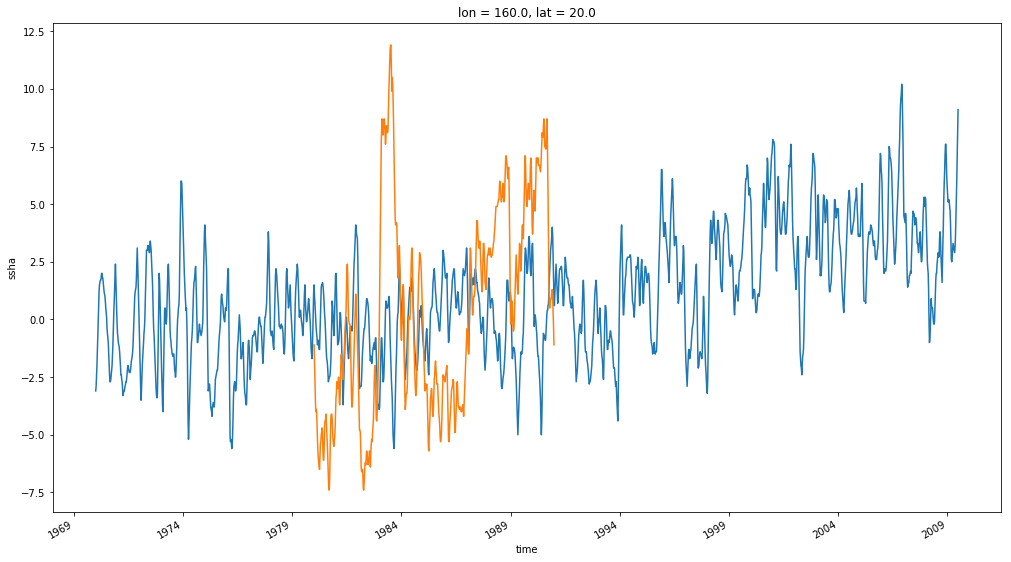

In [11]:
sla_NAtl.plot()
sla_NPac_1980_1990.plot()

# Computation of the spatial average

In [12]:
mean_sla = sla.mean(dim=['lon', 'lat'])

When this command is executed, dask build the series of operation into a graph. The dask array may be accessed using:

In [13]:
print mean_sla.data

dask.array<mean_ag..., shape=(2054,), dtype=float64, chunksize=(520,)>


The dask graph may be visualized using the visualize command

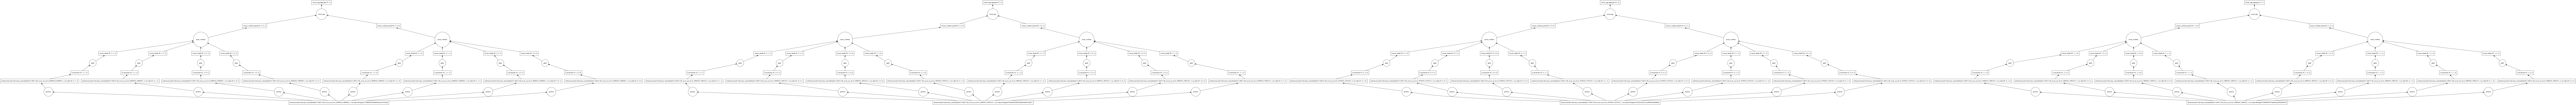

In [14]:
mean_sla.data.visualize()

The computation is automatically performed when the user ask to plot the result, or the computation can be explicitly forced using .compute()

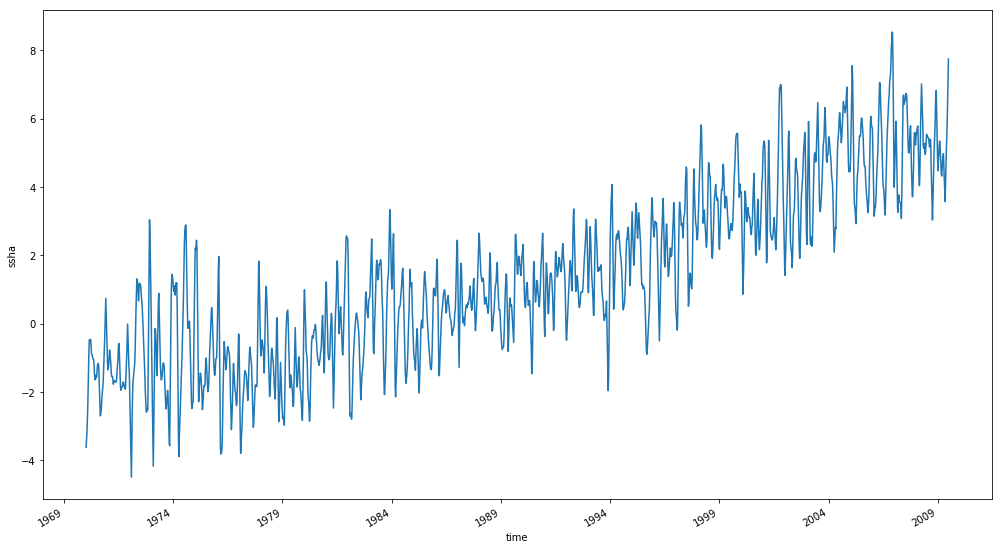

In [15]:
mean_sla.plot()

# Resampling the data

Resampling the data is also trivial. For example if we want the yearly mean sea level from the monthly timeseries.

In [16]:
mean_sla_yearly = mean_sla.resample('A', 'time')

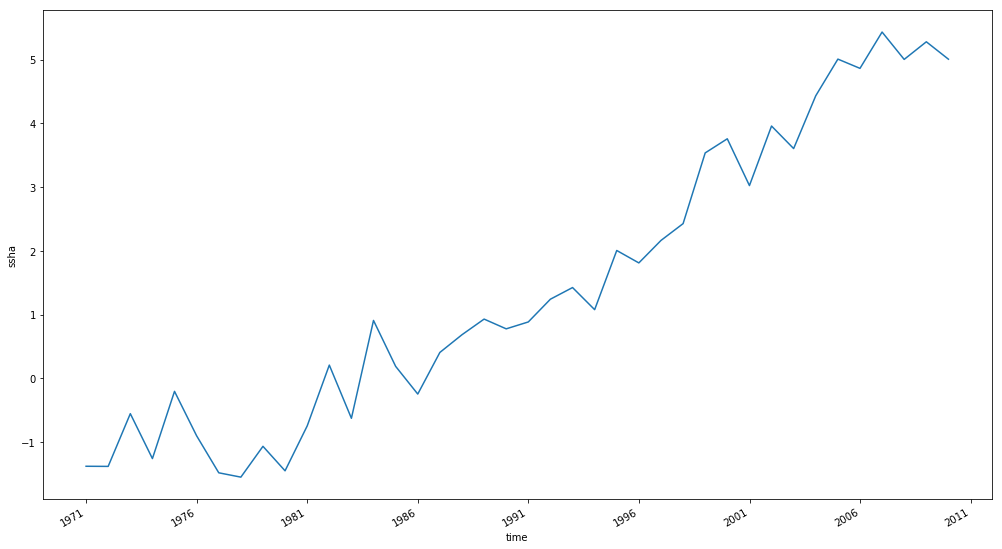

In [17]:
mean_sla_yearly.plot()

# Computing a monthly climatology using groupby

In [18]:
climatology = sla.groupby('time.month').mean('time').compute()
print climatology

/home/serazin/anaconda2/envs/xarray_tutorials/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'ssha' (month: 12, lat: 361, lon: 720)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


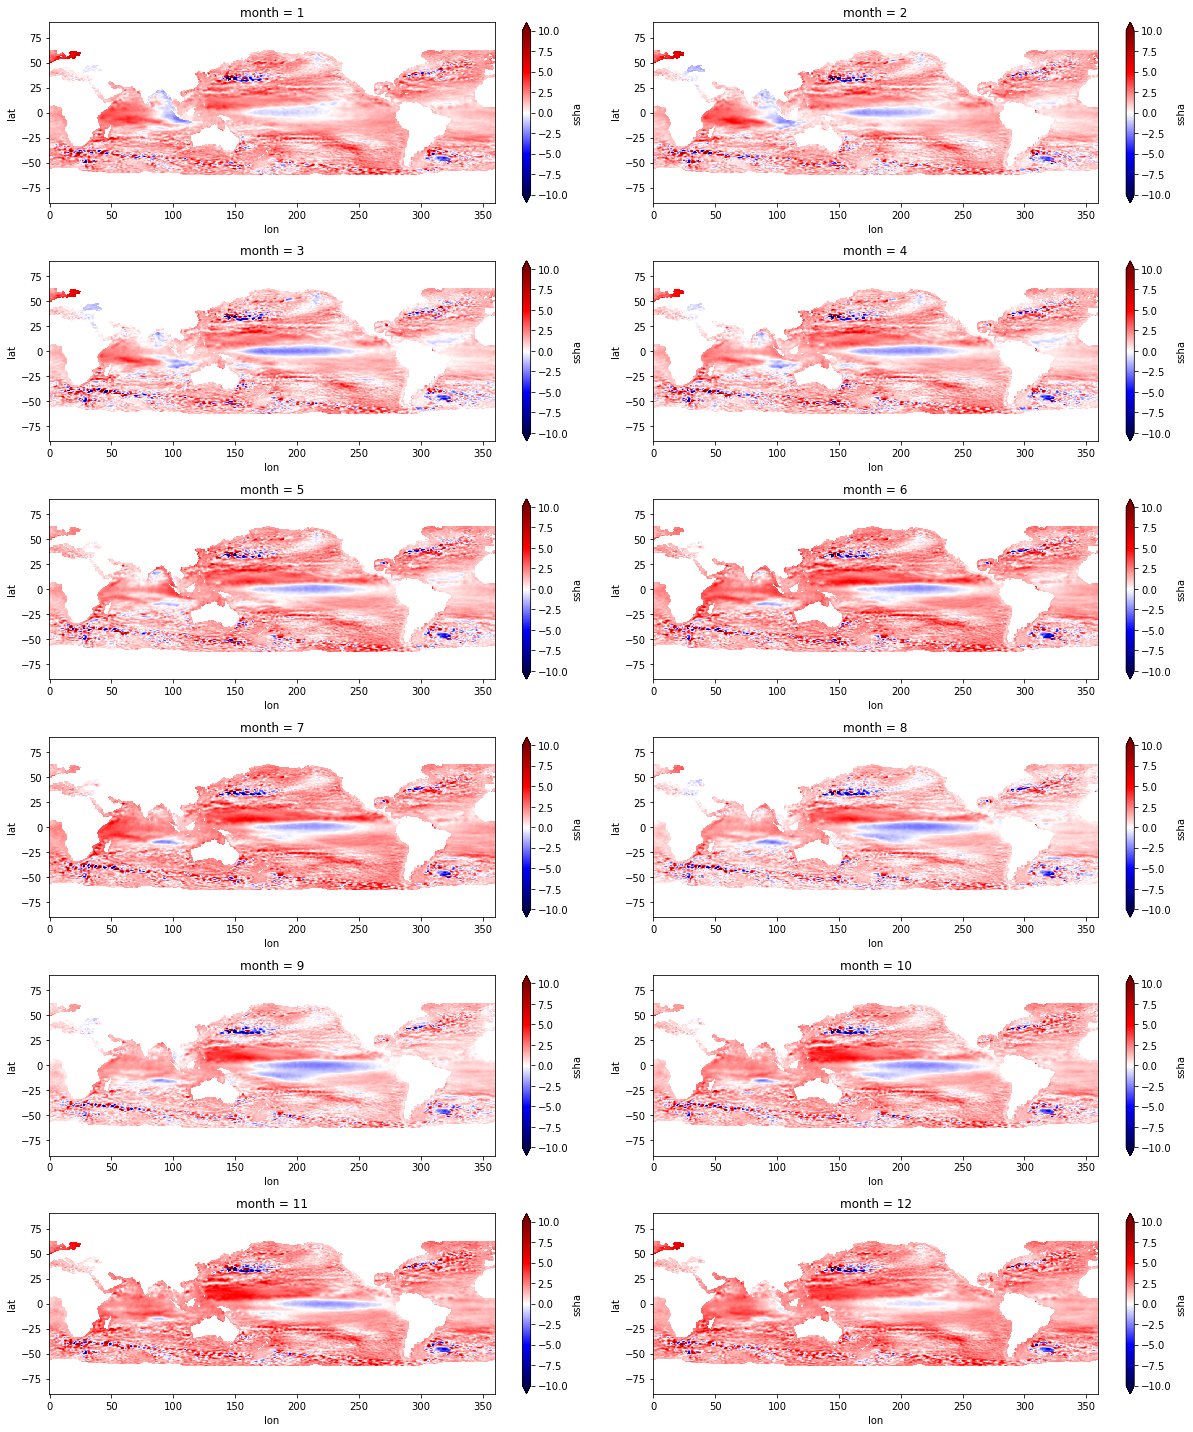

In [19]:
plt.figure(figsize=(17, 20))
for i in range(1, 13):
    ax = plt.subplot(6, 2, i)
    climatology.sel(month=i).plot(x='lon', y='lat', vmin=-10, vmax=10, cmap='seismic', ax=ax)
plt.tight_layout()

# Remove the annual cycle and compute the standard deviation

In [20]:
sla_anomalies = (sla.groupby('time.month') - climatology)
print sla_anomalies

<xarray.DataArray 'ssha' (time: 2054, lat: 361, lon: 720)>
dask.array<transpo..., shape=(2054, 361, 720), dtype=float64, chunksize=(2054, 200, 200)>
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
  * time     (time) datetime64[ns] 1970-01-03T12:13:50.736000 ...
    month    (time) int32 1 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 ...


In [21]:
sla_variability = sla_anomalies.std(dim='time')
print sla_variability

<xarray.DataArray 'ssha' (lat: 361, lon: 720)>
dask.array<sqrt-27..., shape=(361, 720), dtype=float64, chunksize=(200, 200)>
Coordinates:
  * lon      (lon) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...


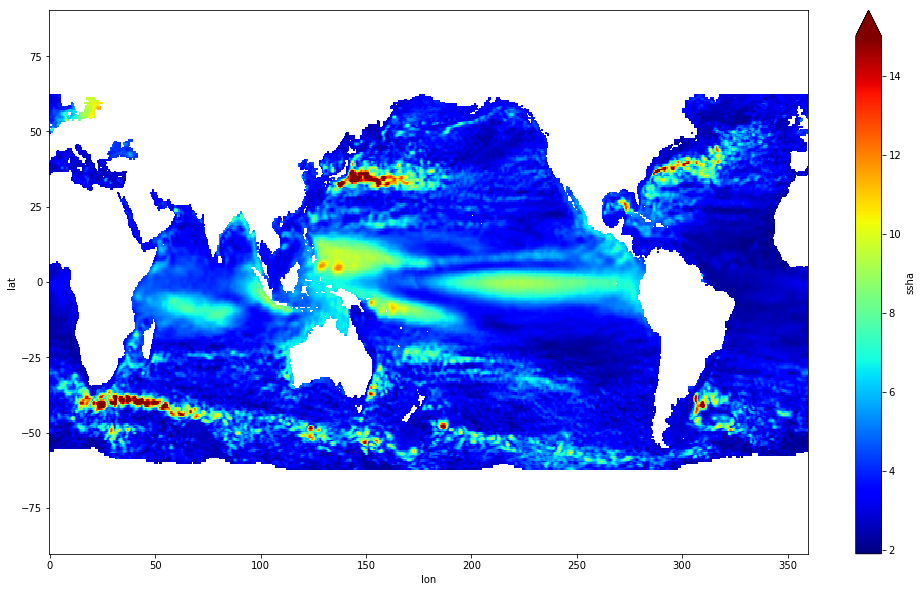

In [23]:
sla_variability.plot(x='lon', y='lat', cmap='jet', vmax=15)